In [6]:
from quantization import load_model, quantize_weights, get_array_size_in_bytes, quantize_model_per_layer
import torch
from matplotlib import pyplot as plt

In [ ]:
exp = 201 # Pick up a model to quantize
model = load_model(exp)

In [2]:
params = torch.cat([p.flatten() for p in model.parameters() if p.requires_grad])
params = params.detach().cpu().numpy()
print(len(params), "=", model.count_parameters(), "->", get_array_size_in_bytes(params), "Bytes")
quantize_model_per_layer(model, num_bits=8);

7.26 Mb
1904135 = 1904135 -> 7616540 Bytes
1.81 Mb
7.26 Mb
compression ratio = 4.004


# Global weights distribution

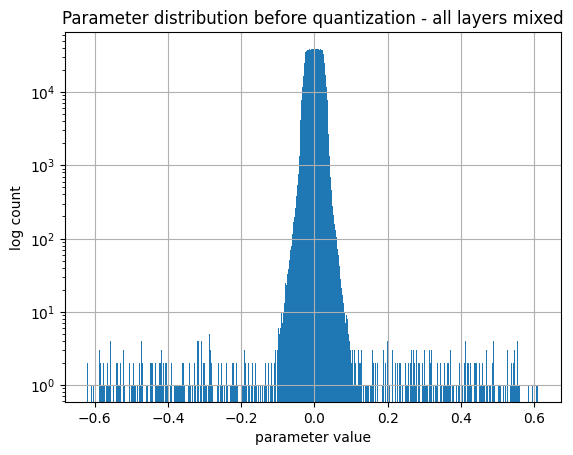

In [5]:
plt.hist(params, bins=1000)
plt.yscale('log')
plt.ylabel('log count')
plt.xlabel('parameter value')
plt.grid()
plt.title('Parameter distribution before quantization - all layers mixed')
plt.show()


# Need  for per-layer quantization
The following graph shows that if we perform global model quantization (same scaling for all weights, we will loose a lot of precision as each layer's weight have a slightly different dynamic).

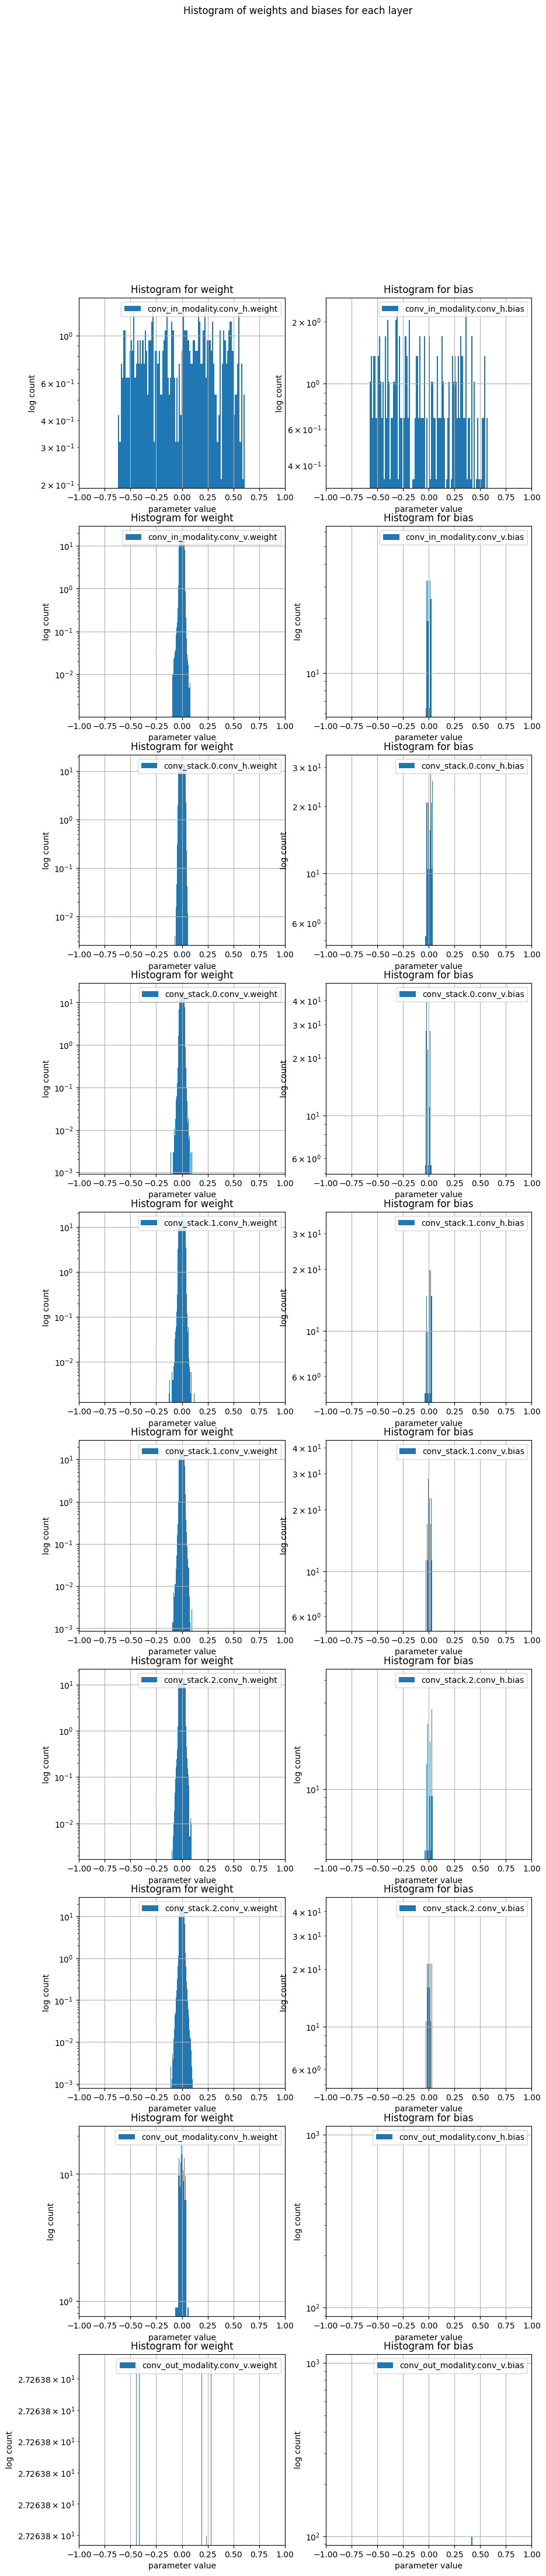

In [4]:
from matplotlib import pyplot as plt
tot = len([1 for _ in model.named_parameters()])
plt.figure(figsize=(10, tot//2*5))
for idx, (name, param) in enumerate(model.named_parameters()):
    if 'bias' not in name:
        plt.subplot(tot//2, 2, idx//2 * 2 + 1)
    else:
        plt.subplot(tot//2, 2, idx//2 * 2 + 2)
    if param.requires_grad:
        layer_params = param.detach().cpu().numpy().flatten()
        plt.hist(layer_params, bins=100, density=True, alpha=1, label=name)
        # plt.title(f'Histogram for Layer: {name}')
        plt.title('Histogram for weight' if 'weight' in name else 'Histogram for bias')
        plt.yscale('log')
        plt.ylabel('log count')
        plt.xlabel('parameter value')
        plt.legend()
        plt.xlim(-1., 1.)
        plt.grid()
plt.suptitle('Histogram of weights and biases for each layer')
plt.show()